# Example Game with a Custom Player

We play a single game using built-in players and one custom player and then try to figure out which one has the best strategy in the long run.

All the imports are centralized in the cell below.

In [34]:
import logging
from functools import partial
import random

import matplotlib.pyplot as plt

from maverick import Game, PlayerLike, PlayerState
from maverick.players import (
    TightAggressiveBot,
    LooseAggressiveBot,
    TightPassiveBot,
    LoosePassiveBot,
    ManiacBot,
    TiltedBot,
    BullyBot,
    GrinderBot,
    GTOBot,
    SharkBot,
    FishBot,
    ABCBot,
    HeroCallerBot,
    ScaredMoneyBot,
    WhaleBot,
)

# We don't want too much logging output here
logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s [%(levelname)s] %(name)s: %(message)s",
)
logging.getLogger().setLevel(logging.WARNING)
logging.getLogger("maverick").setLevel(logging.WARNING)

In [35]:
archetypes = [
    TightAggressiveBot,
    LooseAggressiveBot,
    TightPassiveBot,
    LoosePassiveBot,
    ManiacBot,
    TiltedBot,
    BullyBot,
    GrinderBot,
    GTOBot,
    SharkBot,
    FishBot,
    ABCBot,
    HeroCallerBot,
    ScaredMoneyBot,
    WhaleBot,
]

random.shuffle(archetypes)
selected_archetypes = archetypes[:8]

In [36]:
# Function to play a game with specified parameters
def play_game(
    small_blind:int=10, 
    big_blind:int=20, 
    max_hands:int=40,
    initial_stack:int=1000
) -> tuple[list[PlayerLike],Game]:
    game = Game(small_blind=small_blind, big_blind=big_blind, max_hands=max_hands)

    players: list[PlayerLike] = []
    for i, cls in enumerate(selected_archetypes):
        players.append(
            cls(
                id=f"p{i+1}",
                name=cls.__name__,
                state=PlayerState(stack=initial_stack, seat=i),
            )
        )
        game.add_player(players[-1])
        
    game.start()
    
    return players, game


# Test by playing a single game and printing the final stacks
players, game = play_game(small_blind=10, big_blind=20, max_hands=10, initial_stack=1000)
for player in players:
    print(f"{player.name} - Stack: {player.state.stack}")

HeroCallerBot - Stack: 280
GrinderBot - Stack: 0
WhaleBot - Stack: 0
GTOBot - Stack: 0
LoosePassiveBot - Stack: 0
BullyBot - Stack: 0
FishBot - Stack: 7720
TiltedBot - Stack: 0


Now play a bunch of games and visualize average payoffs. Here we define payoff as the final stock minus the initial stack. This means that the payoff can be negative. The reason behind this choice is that this gives a more intuitive visual representation (look at the FoldBot).

In [37]:
payoffs = {a.__name__ : 0 for a in archetypes}
num_games = {a.__name__ : 0 for a in archetypes}

In [38]:
# Start with a smaller number (like 100) to get a feel of execution time,
# then you can move to higher numbers like 10_000 for a more confident estimation.
n_games = 10000

# Define game parameters
small_blind = 10
big_blind = 20
max_hands = 10         # limit the number of hands per game
initial_stack = 1000

# Create helper function with fixed parameters
play = partial(
    play_game, 
    small_blind=small_blind, 
    big_blind=big_blind, 
    max_hands=max_hands,
    initial_stack=initial_stack
)

# Collect results
for _ in range(n_games):
    random.shuffle(archetypes)
    selected_archetypes = archetypes[:8]
    players, game = play()
    for player in players:
        payoffs[player.__class__.__name__] += player.state.stack - initial_stack
        num_games[player.__class__.__name__] += 1

# Compute average payoffs    
average_payoffs = {name: payoffs[name]/num_games[name] for name in payoffs}

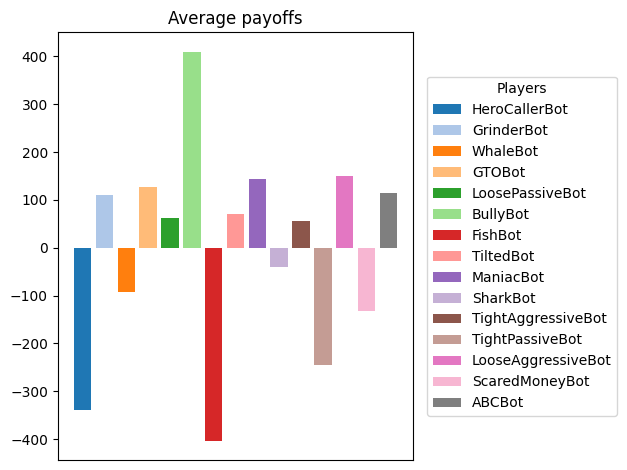

In [39]:
fig, ax = plt.subplots()

names = []
avg_payoffs = []
for name, avg_payoff in average_payoffs.items():
    names.append(name)
    avg_payoffs.append(avg_payoff)

cmap = plt.get_cmap("tab20")
for i, (player_name, payoff) in enumerate(zip(names, avg_payoffs)):
    ax.bar(player_name, payoff, color=cmap(i % cmap.N), label=player_name)

ax.set_title(f"Average payoffs")
ax.legend(
    title="Players",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

# Remove x-axis labels (tick labels)
ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

plt.tight_layout()
plt.show()